SVM Classifier Report:
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       167
           1       0.87      1.00      0.93        33

    accuracy                           0.97       200
   macro avg       0.93      0.99      0.96       200
weighted avg       0.98      0.97      0.98       200

Random Forest Classifier Report:
Accuracy: 0.995
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      0.97      0.98        33

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



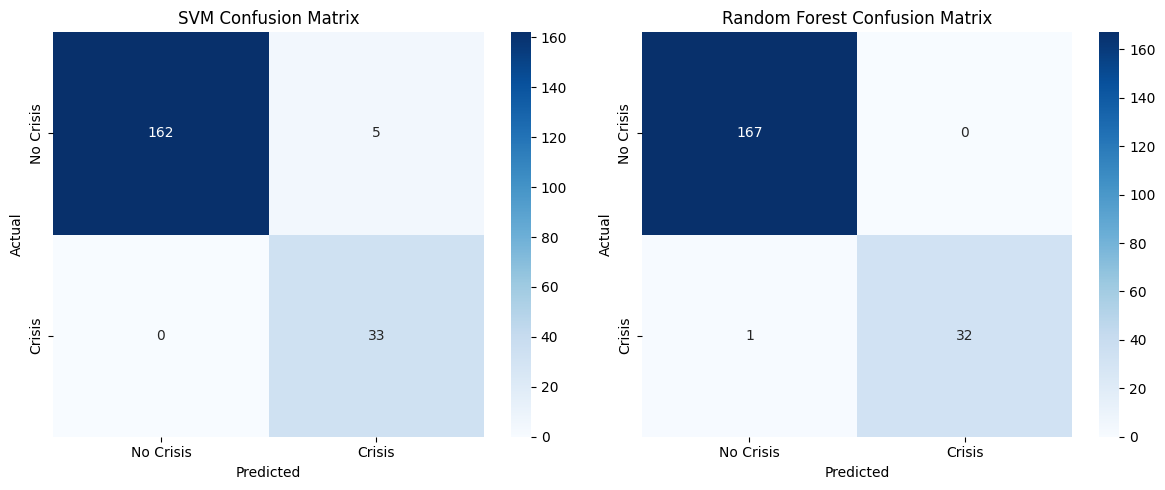

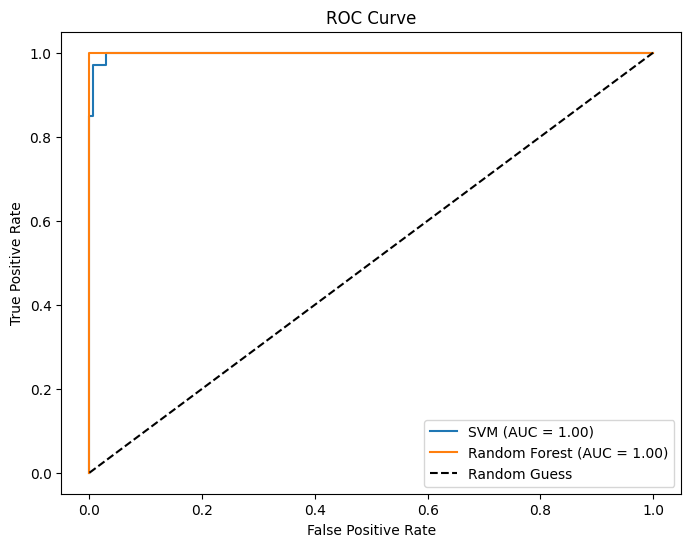

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load dataset
file_path = 'synthetic_cbc_weekly_data.csv'
cbc_data = pd.read_csv(file_path)

# Select relevant features
features = ['WBC', 'HGB', 'LYMp', 'PLT']
cbc_data = cbc_data[features]

# Define crisis risk status
cbc_data['risk_status'] = np.where((cbc_data['HGB'] > 13) & (cbc_data['WBC'] > 9), 1, 0)

# Split data
X = cbc_data[['WBC', 'HGB', 'LYMp', 'PLT']]
y = cbc_data['risk_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict using SVM
svm_y_pred = svm_model.predict(X_test_scaled)
svm_y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print classification reports
print("SVM Classifier Report:")
print(f"Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_y_pred))
print("Random Forest Classifier Report:")
print(f"Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_y_pred))

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'], ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [6]:
import pickle
import tensorflow as tf


with open('random_forest_model2.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


Training Class Distribution:
risk_status
0    926
1     74
Name: count, dtype: int64
SVM Classifier Report:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        19

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

Random Forest Classifier Report:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        19

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



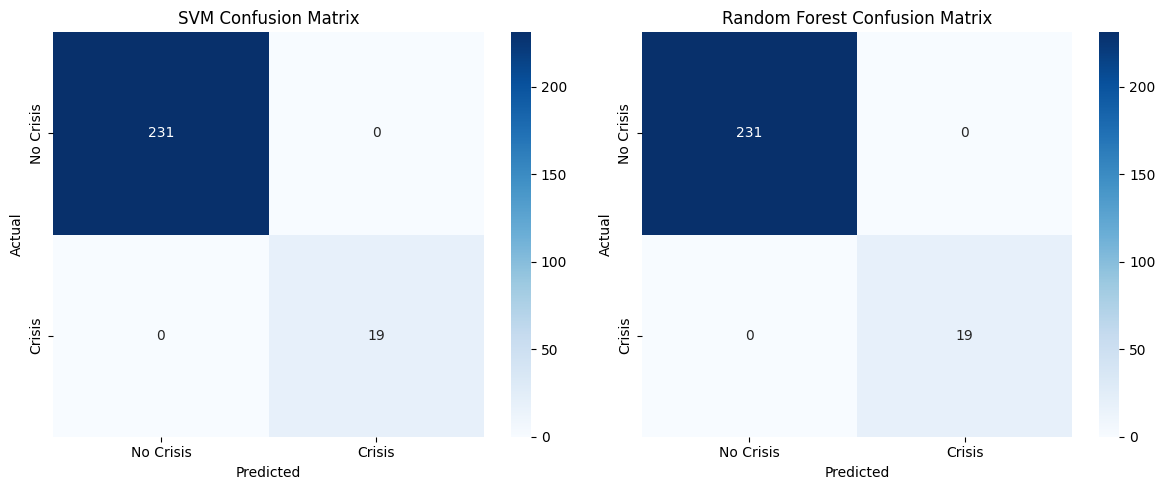

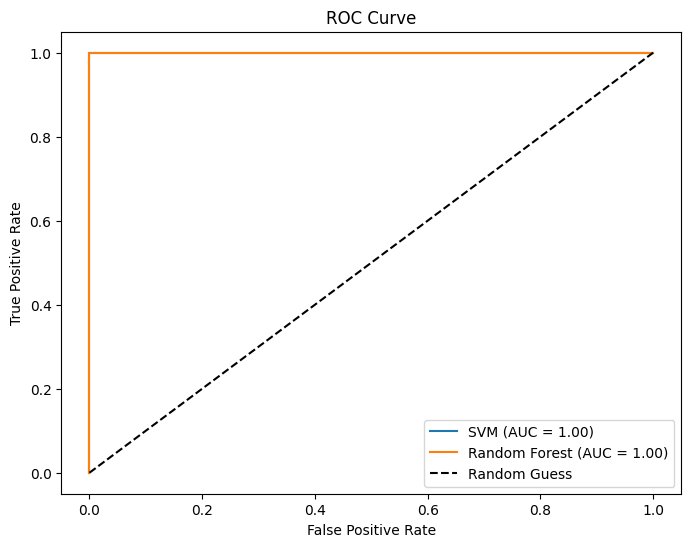

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load dataset
file_path = 'synthetic_sickle_cbc_updated2.xlsx'
cbc_data = pd.read_excel(file_path)

# Select relevant features
features = ['WBC', 'HGB', 'LYMp', 'NEUTp']
cbc_data = cbc_data[features]

# Define crisis risk status
cbc_data['risk_status'] = np.where((cbc_data['HGB'] < 6) & (cbc_data['WBC'] > 10), 1, 0)

# Split data
X = cbc_data[['WBC', 'HGB', 'LYMp', 'NEUTp']]
y = cbc_data['risk_status']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Class Distribution:")
print(pd.Series(y_train).value_counts())



# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict using SVM
svm_y_pred = svm_model.predict(X_test_scaled)
svm_y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_pred_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print classification reports
print("SVM Classifier Report:")
print(f"Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_y_pred))
print("Random Forest Classifier Report:")
print(f"Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_y_pred))

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'], ax=axes[0])
axes[0].set_title("SVM Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Crisis', 'Crisis'], yticklabels=['No Crisis', 'Crisis'], ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
import pickle
import tensorflow as tf


with open('random_forest_model2.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [23]:
# Example new data point
new_data = np.array([[9, 7.0, 40, 50]])  # Modify WBC, HGB, LYMp, NEUTp as needed

# Standardize the new data point using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using SVM
svm_prediction = svm_model.predict(new_data_scaled)
svm_prediction_prob = svm_model.predict_proba(new_data_scaled)[:, 1]

# Predict using Random Forest
rf_prediction = rf_model.predict(new_data)
rf_prediction_prob = rf_model.predict_proba(new_data)[:, 1]

# Print results
print("SVM Prediction:", "Crisis" if svm_prediction[0] == 1 else "No Crisis")
print("SVM Probability of Crisis:", svm_prediction_prob[0])

print("Random Forest Prediction:", "Crisis" if rf_prediction[0] == 1 else "No Crisis")
print("Random Forest Probability of Crisis:", rf_prediction_prob[0])


SVM Prediction: No Crisis
SVM Probability of Crisis: 0.00022694283068302326
Random Forest Prediction: No Crisis
Random Forest Probability of Crisis: 0.0


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
